## Logistic regression

    """
    @author : KIM DONG EON
    rectified : 2021-11-14
    """

In [1]:
import pandas as pd
import os 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.getcwd()

'c:\\Users\\EonKim\\OneDrive\\khu\\study\\ML_programming'

In [3]:
df = pd.read_csv('Personal Loan.csv', encoding = 'utf-8', index_col = 0)

In [7]:
df1 = df[df.iloc[:,-1] == 1].reset_index(drop = True)
df0 = df[df.iloc[:,-1] == 0].reset_index(drop = True)

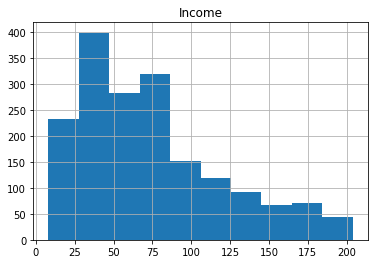

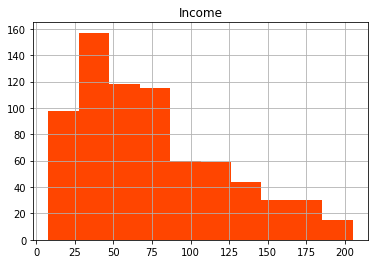

In [5]:
df0.hist('Income');
df1.hist('Income', color = 'OrangeRed');


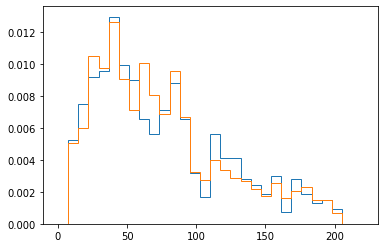

In [6]:
plt.hist(df1['Income'], bins = 30, range = (0, 220), density = True, histtype = 'step');
plt.hist(df0['Income'], bins = 30, range = (0, 220), density = True, histtype = 'step');

In [7]:
df1.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
16,60,30,22,95054,1,1.5,3,0,0,0,0,1,1
20,55,28,21,94720,1,0.5,2,0,0,1,0,0,1
25,36,11,152,95521,2,3.9,1,159,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,43,18,89,92780,1,0.1,2,307,0,0,0,0,1
2471,33,7,81,92122,2,4.5,3,187,0,0,1,1,1
2483,28,4,129,92115,1,1.5,1,0,0,0,0,0,1


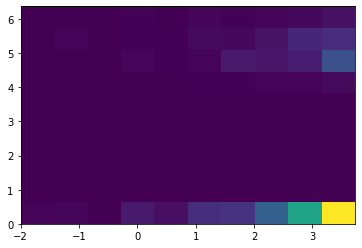

In [51]:
plt.hist2d(df1['Experience'].apply(lambda x: np.log(x) if x > 0 else x), df1['Mortgage'].apply(lambda x: np.log(x) if x > 0 else x));

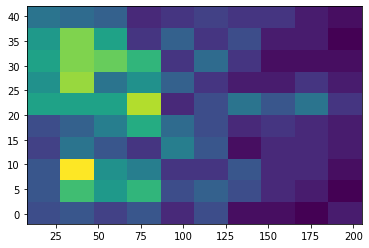

In [37]:
plt.hist2d(df1['Income'], df1['Experience']);

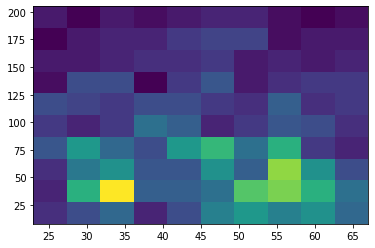

In [42]:
plt.hist2d(df1['Age'], df1['Income']);

In [10]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
1,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
2,60,30,22,95054,1,1.5,3,0,0,0,0,1,1
3,55,28,21,94720,1,0.5,2,0,0,1,0,0,1
4,36,11,152,95521,2,3.9,1,159,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,43,18,89,92780,1,0.1,2,307,0,0,0,0,1
722,33,7,81,92122,2,4.5,3,187,0,0,1,1,1
723,28,4,129,92115,1,1.5,1,0,0,0,0,0,1
724,61,36,48,94025,3,1.5,1,0,0,0,0,0,1


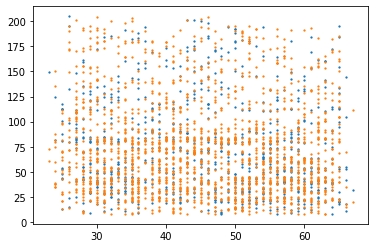

In [16]:
plt.plot(df1.Age, df1.Income, '.', ms = 2.5);
plt.plot(df0.Age, df0.Income, '.', ms = 2.5)

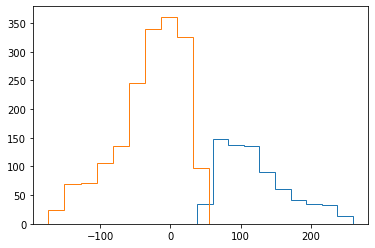

In [22]:
plt.hist(df1.Age + df1.Income, histtype = 'step');
plt.hist(df0.Age - df0.Income, histtype = 'step');

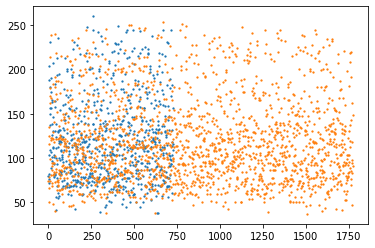

In [78]:
plt.plot(df1.Age + df1.Income, '.', ms = 2.5);
plt.plot(df0.Age + df0.Income, '.', ms = 2.5);

In [79]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [80]:
def f(x, y, a, b, c):
    return a*x + b*y + c

In [81]:
dts1 = np.array(df1.Age) 
dts0 = np.array(df0.Age)

drs1 = np.array(df1.Income)
drs0 = np.array(df0.Income)

label1 = np.ones(dts1.shape)
label0 = np.zeros(dts0.shape)

In [82]:
dts = np.concatenate([dts1, dts0])
drs = np.concatenate([drs1, drs0])
label = np.concatenate([label1, label0])

data = np.stack([dts, drs, label], axis = 1)
np.random.shuffle(data)

In [83]:
data.shape

(2500, 3)

In [84]:
def gradF(x, y, a, b, c):
    # 1 / (1 + np.exp(-a*x - b*y - c))
    z = f(x, y, a, b, c)
    yy = sigmoid(z)*(1-sigmoid(z))
    
    da = yy*x
    db = yy*y
    dc = yy*1 
    
    return da, db, dc 

In [89]:
losses = []
fitA, fitB, fitC = 10000, 10, 10
batch_size = 32
eta = 1e-5
for epoch in range(100):
    sumLoss = 0.
    nBatch = 0
    for batch in range(0, len(dts0), batch_size):
        ### loss
        x = data[batch:batch+batch_size+1].T
        # dt, dr, label = x[:,0], x[:,1], x[:,2]
        dt, dr, label = x[0], x[1], x[2]
        z = f(dt, dr, fitA, fitB, fitC)
        z = sigmoid(z)
        
        df = label - z
        
        loss = (df**2).mean()
        ### Gradient
        gradA, gradB, gradC = -2*df*gradF(dt, dr, fitA, fitB, fitC)
        gradA = (df*gradA).mean()
        gradB = (df*gradB).mean()
        gradC = (df*gradC).mean()
        
        ### parameter update
        fitA = fitA - gradA*eta 
        fitB = fitB - gradB*eta 
        fitC = fitC - gradC*eta
         
        ### loss monitor
        sumLoss += 0 
        nBatch += 1
    losses.append(sumLoss / nBatch)

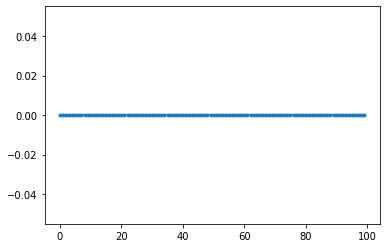

In [91]:
plt.plot(losses, '.-');